In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline 

In [2]:
from fastai import * 
from fastai.text import *

In [3]:
path = untar_data(URLs.IMDB_SAMPLE)
path.ls()

[PosixPath('/tmp/.fastai/data/imdb_sample/texts.csv')]

In [4]:
df = pd.read_csv(path/'texts.csv')
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [5]:
df['text'][1]

'This is a extremely well-made film. The acting, script and camera-work are all first-rate. The music is good, too, though it is mostly early in the film, when things are still relatively cheery. There are no really superstars in the cast, though several faces will be familiar. The entire cast does an excellent job with the script.<br /><br />But it is hard to watch, because there is no good end to a situation like the one presented. It is now fashionable to blame the British for setting Hindus and Muslims against each other, and then cruelly separating them into two countries. There is some merit in this view, but it\'s also true that no one forced Hindus and Muslims in the region to mistreat each other as they did around the time of partition. It seems more likely that the British simply saw the tensions between the religions and were clever enough to exploit them to their own ends.<br /><br />The result is that there is much cruelty and inhumanity in the situation and this is very u

In [6]:
data_lm = TextLMDataBunch.from_csv(path, 'texts.csv')

In [7]:
data_clas = TextClasDataBunch.from_csv(path, 'texts.csv', 
                                       vocab=data_lm.train_ds.vocab, bs=32)

In [8]:
data = (TextList.from_csv(path, 'texts.csv', cols='text')
       .split_from_df(col=2)
       .label_from_df(cols=0)
       .databunch())

In [9]:
path = untar_data(URLs.IMDB)
path.ls()

[PosixPath('/tmp/.fastai/data/imdb/tmp_lm'),
 PosixPath('/tmp/.fastai/data/imdb/imdb.vocab'),
 PosixPath('/tmp/.fastai/data/imdb/README'),
 PosixPath('/tmp/.fastai/data/imdb/test'),
 PosixPath('/tmp/.fastai/data/imdb/unsup'),
 PosixPath('/tmp/.fastai/data/imdb/tmp_clas'),
 PosixPath('/tmp/.fastai/data/imdb/train')]

In [10]:
(path/'train').ls()

[PosixPath('/tmp/.fastai/data/imdb/train/neg'),
 PosixPath('/tmp/.fastai/data/imdb/train/unsupBow.feat'),
 PosixPath('/tmp/.fastai/data/imdb/train/labeledBow.feat'),
 PosixPath('/tmp/.fastai/data/imdb/train/pos')]

In [11]:
data_lm = (TextList.from_folder(path)
          .filter_by_folder(include=['train','test'])
          .split_by_rand_pct(0.1)
          .label_for_lm()
          .databunch())

In [12]:
learn.lr_find()

NameError: name 'learn' is not defined

In [13]:
learn.recorder.plot(skip_end=15)

NameError: name 'learn' is not defined

In [14]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

NameError: name 'learn' is not defined

In [15]:
learn.save('fit_head')

NameError: name 'learn' is not defined

In [16]:
learn.load('fit_head')

NameError: name 'learn' is not defined

In [17]:
learn.unfreeze()
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

NameError: name 'learn' is not defined

In [18]:
learn.save('fine_tuned')

NameError: name 'learn' is not defined

In [19]:
learn.load('fine_tuned')

NameError: name 'learn' is not defined

In [20]:
learn.predict('I like this movie because', 100, temperature=0.1, 
              min_p=0.001)

NameError: name 'learn' is not defined

In [21]:
learn.save_encoder('fine_tune_enc')

NameError: name 'learn' is not defined

In [22]:
data_clas = (TextList.from_folder(path, vocab=data_lm.vocab)
            .split_by_folder(valid='test')
            .label_from_folder(classes=['neg','pos'])
            .databunch(bs=50))

In [23]:
data_clas.save('data_clas.pkl')

In [24]:
data_clas = load_data(path, 'data_clas.pkl', bs=50)
data_clas.show_batch()

text,target
xxbos xxmaj match 1 : xxmaj tag xxmaj team xxmaj table xxmaj match xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley vs xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley started things off with a xxmaj tag xxmaj team xxmaj table xxmaj match against xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit . xxmaj according to the rules,pos
"xxbos * * xxmaj attention xxmaj spoilers * * \n \n xxmaj first of all , let me say that xxmaj rob xxmaj roy is one of the best films of the 90 's . xxmaj it was an amazing achievement for all those involved , especially the acting of xxmaj liam xxmaj neeson , xxmaj jessica xxmaj lange , xxmaj john xxmaj hurt , xxmaj brian xxmaj cox",pos
"xxbos xxmaj titanic directed by xxmaj james xxmaj cameron presents a fictional love story on the historical setting of the xxmaj titanic . xxmaj the plot is simple , xxunk , or not for those who love plots that twist and turn and keep you in suspense . xxmaj the end of the movie can be figured out within minutes of the start of the film , but the love",pos
"xxbos xxmaj some have praised _ xxunk _ as a xxmaj disney adventure for adults . i do n't think so -- at least not for thinking adults . \n \n xxmaj this script suggests a beginning as a live - action movie , that struck someone as the type of crap you can not sell to adults anymore . xxmaj the "" crack staff "" of many older",neg
"xxbos xxmaj this movie was recently released on xxup dvd in the xxup us and i finally got the chance to see this hard - to - find gem . xxmaj it even came with original theatrical previews of other xxmaj italian horror classics like "" xxup xxunk "" and "" xxup beyond xxup the xxup darkness "" . xxmaj unfortunately , the previews were the best thing about this",neg


In [25]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tune_enc')

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/.fastai/data/imdb/models/fine_tune_enc.pth'

In [26]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


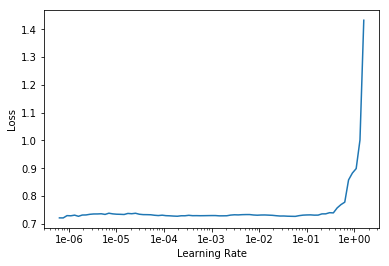

In [27]:
learn.recorder.plot()

In [28]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.693447,0.721636,0.613120,02:41


In [29]:
learn.save('first')

In [30]:
learn.load('first')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (25000 items)
x: TextList
xxbos xxmaj chances are if i watched this again i might get physically sick , the film is so annoying xxrep 5 . unless you believe in psychics , re - incarnation and the other xxunk pocus which this promotes big - time . xxmaj the " re - cycling of souls , " they call it here . xxmaj puh - leeze . 
 
  xxmaj this story has been done several times before with such films as " xxmaj heaven xxmaj can xxmaj wait . " xxmaj it 's also been done a lot better . xxmaj too bad they had to waste the talents of xxmaj robert xxmaj downey xxmaj jr. , xxmaj cybill xxmaj shepherd , xxmaj ryan o'neal and xxmaj mary xxmaj stuart xxmaj masterson . 
 
  xxmaj at least it 's a pretty tame film , language - wise . xxmaj that 's about the only redeeming quality of this movie .,xxbos i saw this movie once a long time ago , and i have no desire to ever see it again . 
 
  xxmaj this movie is about xxmaj preston xxmaj waters , a hard 

In [31]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2**6),1e-2),moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.671176,0.671176,0.601000,02:59


In [32]:
learn.save('second')

In [33]:
learn.load('second')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (25000 items)
x: TextList
xxbos xxmaj chances are if i watched this again i might get physically sick , the film is so annoying xxrep 5 . unless you believe in psychics , re - incarnation and the other xxunk pocus which this promotes big - time . xxmaj the " re - cycling of souls , " they call it here . xxmaj puh - leeze . 
 
  xxmaj this story has been done several times before with such films as " xxmaj heaven xxmaj can xxmaj wait . " xxmaj it 's also been done a lot better . xxmaj too bad they had to waste the talents of xxmaj robert xxmaj downey xxmaj jr. , xxmaj cybill xxmaj shepherd , xxmaj ryan o'neal and xxmaj mary xxmaj stuart xxmaj masterson . 
 
  xxmaj at least it 's a pretty tame film , language - wise . xxmaj that 's about the only redeeming quality of this movie .,xxbos i saw this movie once a long time ago , and i have no desire to ever see it again . 
 
  xxmaj this movie is about xxmaj preston xxmaj waters , a hard 

In [34]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3),moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.602485,0.577515,0.718120,03:55


In [35]:
learn.save('third')

In [36]:
learn.load('third')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (25000 items)
x: TextList
xxbos xxmaj chances are if i watched this again i might get physically sick , the film is so annoying xxrep 5 . unless you believe in psychics , re - incarnation and the other xxunk pocus which this promotes big - time . xxmaj the " re - cycling of souls , " they call it here . xxmaj puh - leeze . 
 
  xxmaj this story has been done several times before with such films as " xxmaj heaven xxmaj can xxmaj wait . " xxmaj it 's also been done a lot better . xxmaj too bad they had to waste the talents of xxmaj robert xxmaj downey xxmaj jr. , xxmaj cybill xxmaj shepherd , xxmaj ryan o'neal and xxmaj mary xxmaj stuart xxmaj masterson . 
 
  xxmaj at least it 's a pretty tame film , language - wise . xxmaj that 's about the only redeeming quality of this movie .,xxbos i saw this movie once a long time ago , and i have no desire to ever see it again . 
 
  xxmaj this movie is about xxmaj preston xxmaj waters , a hard 

In [37]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.478593,0.433975,0.807600,04:42
1,0.398611,0.391655,0.831480,04:41


In [38]:
learn.predict("I can't wait for Nic Cage to explain THIS one to God on Judgment Day.")

(Category neg, tensor(0), tensor([0.5254, 0.4746]))